# Chart variable correlations with income shock risk

First, let's import all the necessary modules...

In [1]:
import nlsy
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

sns.set(style="ticks", color_codes=True)
%matplotlib inline

NLSY_db = nlsy.NLSY_database("data.db")
(cohort_79, cohort_97) = NLSY_db.cohorts

Next, let's define a function that will chart all of the associations for a given cohort...

In [2]:
def chart_data(data):

    # First, chart all the columns that don't require any bucketing of various values
    columns = ["sex", "race", "year", "curr_pregnant", "age", "marital_status", "inflation", "unemployment", "work_kind_limited", "work_amount_limited", "urban_or_rural", "region"]

    for column in columns:
        x_vals = []
        y_vals = [] 
        for key, value in data[column].value_counts().sort_index().items():
            if key < 0:
                continue
            shocks = len(data[(data['shock'] == 1) & (data[column] == key)])
            non_shocks = len(data[(data['shock'] == 0) & (data[column] == key)])
            if shocks > 0 or non_shocks > 0:
                x_vals.append(key)
                y_vals.append(shocks / (shocks + non_shocks))
        df = pd.DataFrame({'Value': x_vals, 'Shock Percentage': y_vals})
        ax = df.plot.bar(x='Value', y='Shock Percentage', title=column, legend=False)

    # For columns that require bucketing, identify the appropriate buckets to use.
    bucketed_columns = {"adjusted_income": 
                            [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 
                             100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000],
                        "family_size":
                            [1, 2, 3, 4, 5],
                        "highest_grade":
                            [0, 12, 16, 20]}

    for column, val_list in bucketed_columns.items():
        x_vals = []
        y_vals = [] 
        for index, value in enumerate(val_list):
            if index < (len(val_list) - 1):
                shocks = len(data[(data['shock'] == 1) & (data[column] >= value) & (data[column] < val_list[index + 1])])
                non_shocks = len(data[(data['shock'] == 0) & (data[column] >= value) & (data[column] < val_list[index + 1])])
            else:
                shocks = len(data[(data['shock'] == 1) & (data[column] >= value)])
                non_shocks = len(data[(data['shock'] == 0) & (data[column] >= value)])        
            if shocks > 0 or non_shocks > 0:
                x_vals.append(value)
                y_vals.append(shocks / (shocks + non_shocks))
        df = pd.DataFrame({'Value': x_vals, 'Shock Percentage': y_vals})
        ax = df.plot.bar(x='Value', y='Shock Percentage', title=column, legend=False)

Now, let's chart the 1979 cohort data...

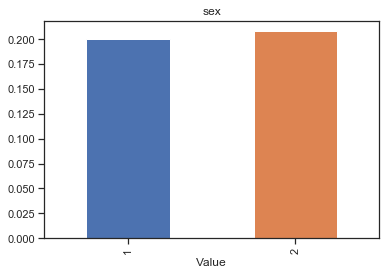

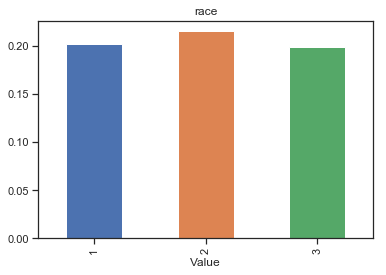

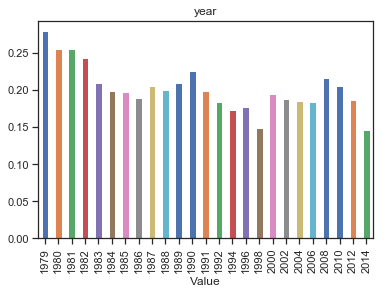

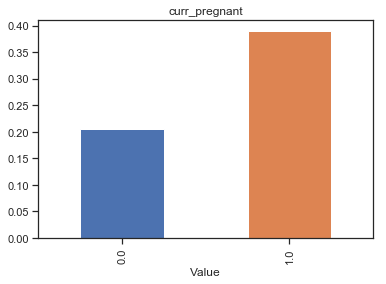

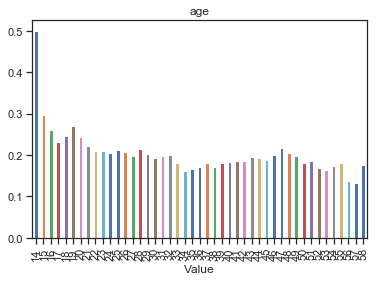

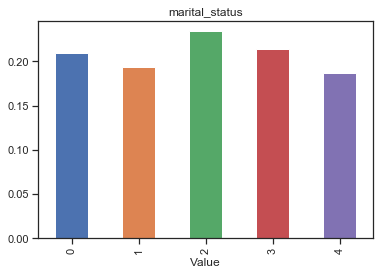

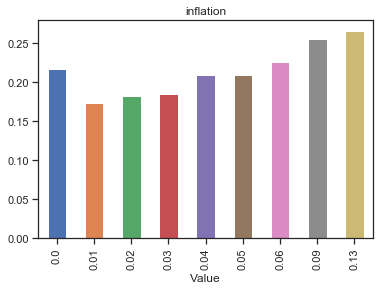

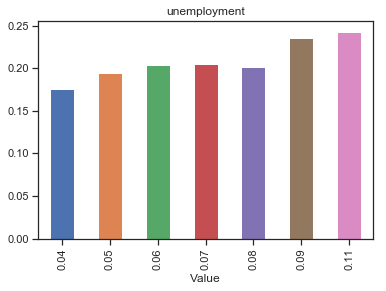

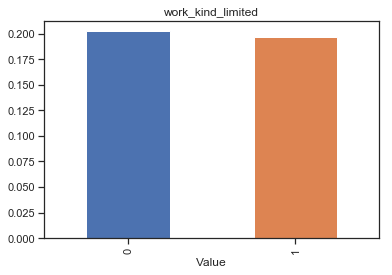

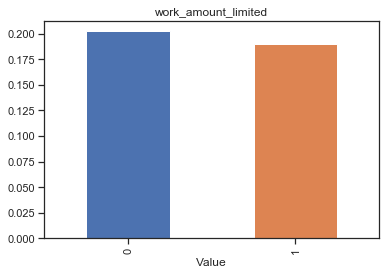

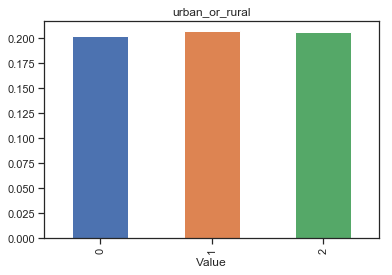

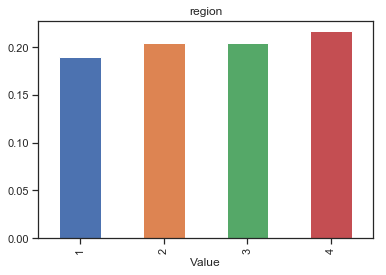

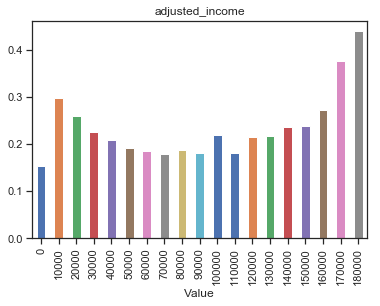

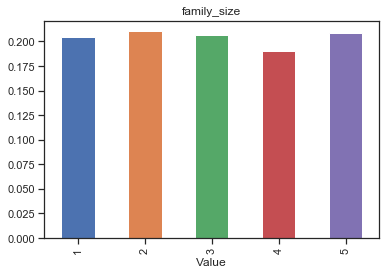

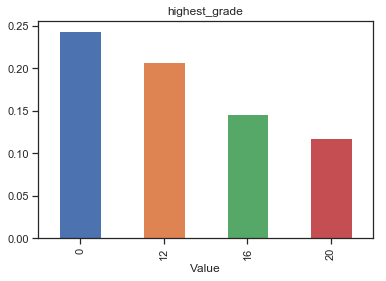

In [3]:
chart_data(cohort_79.data())

Then, let's do the same for the 1997 cohort...

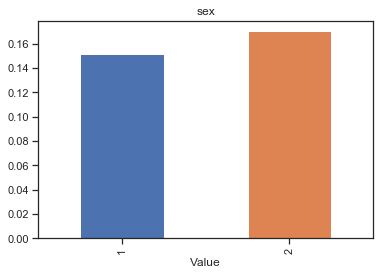

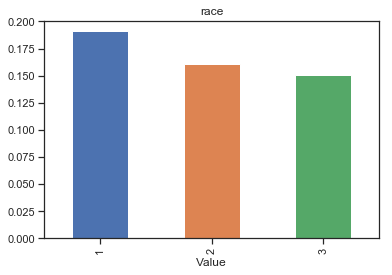

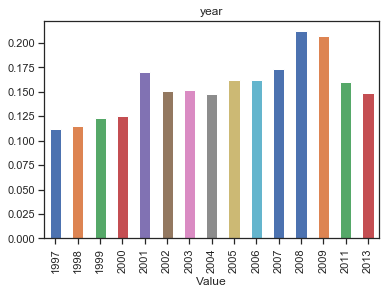

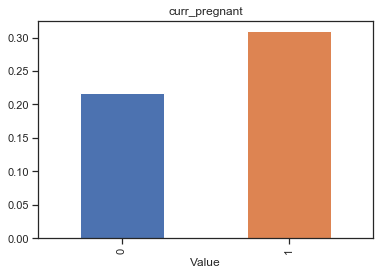

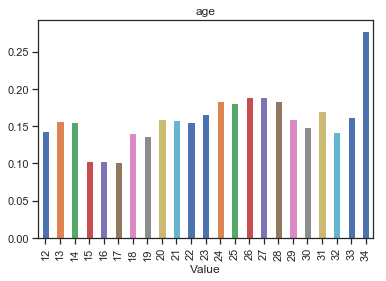

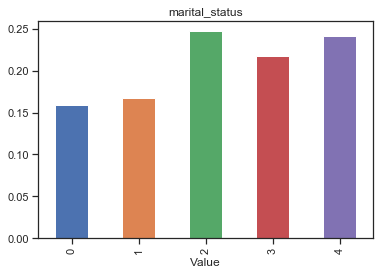

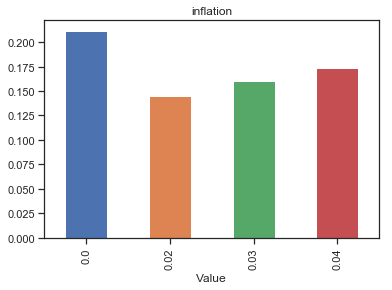

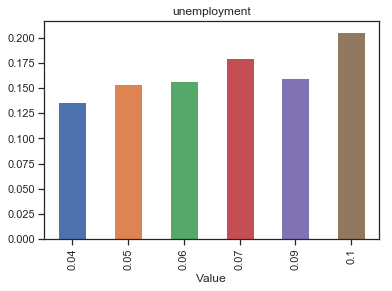

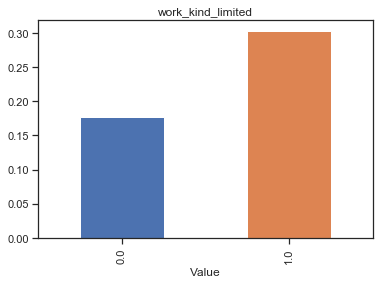

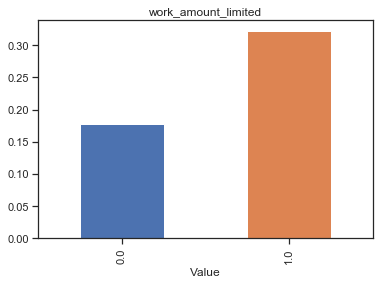

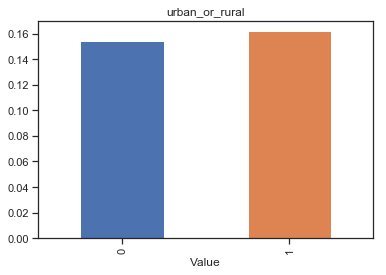

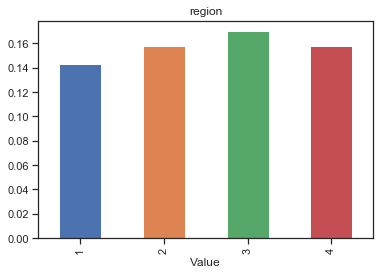

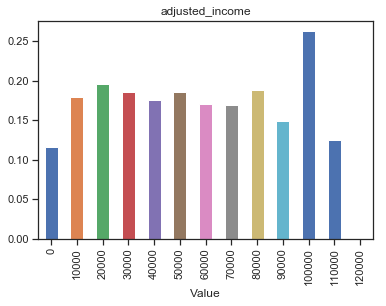

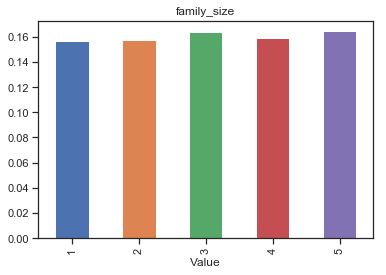

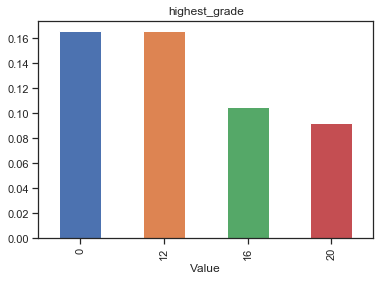

In [4]:
chart_data(cohort_97.data())

And finally, let's do it for all data across both data sets.

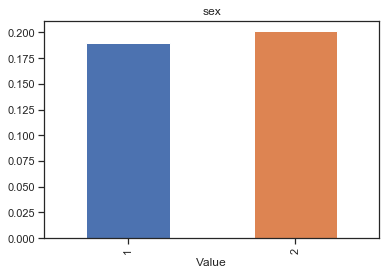

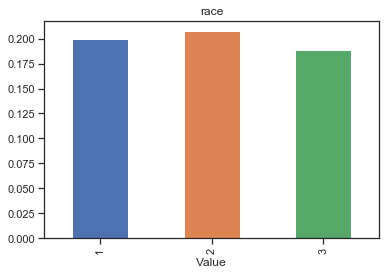

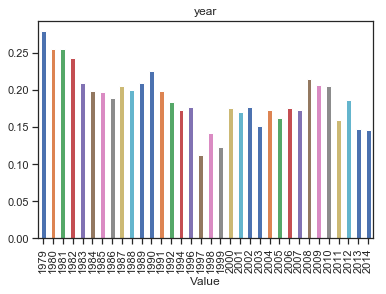

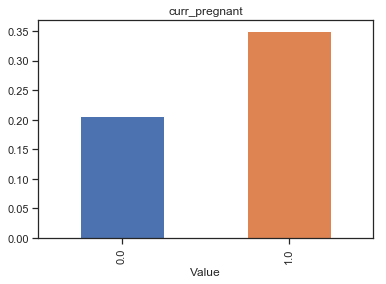

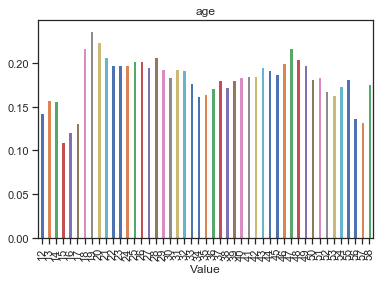

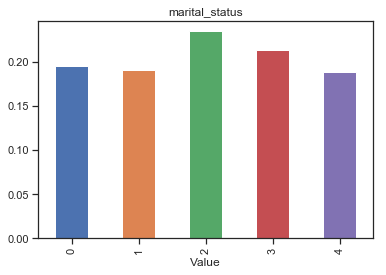

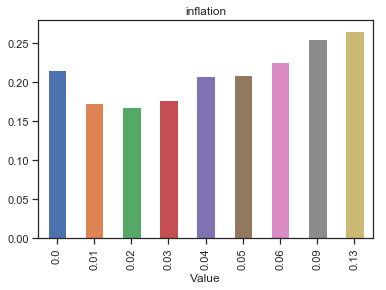

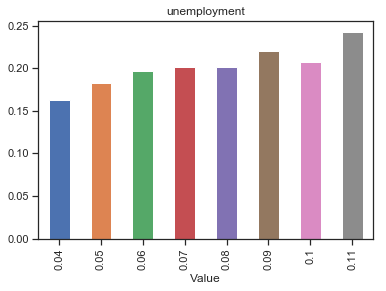

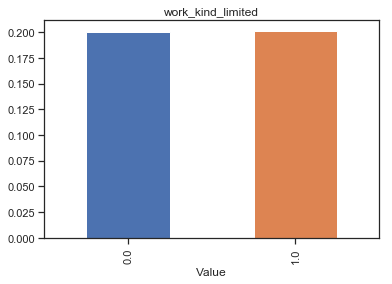

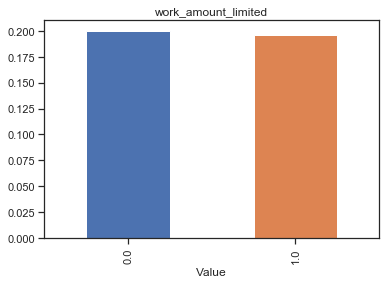

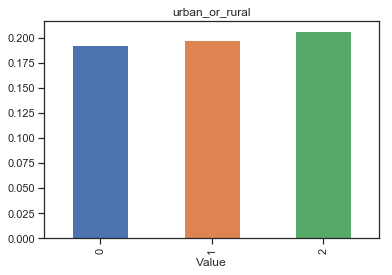

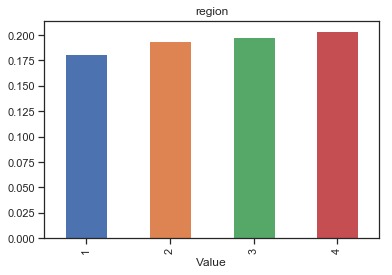

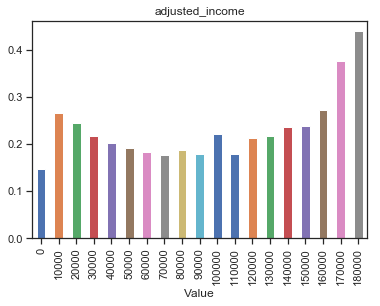

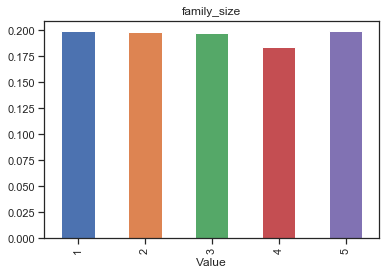

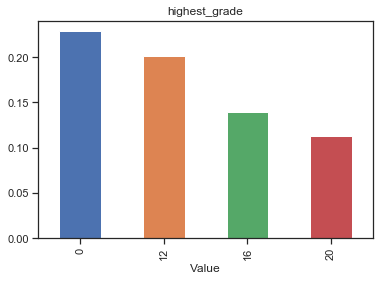

In [5]:
merged_data = pd.concat([cohort_79.data(), cohort_97.data()])
chart_data(merged_data)